In [ ]:
!pip install nltk
!pip install demoji
!pip install Sastrawi
import nltk #import nltk
nltk.download('wordnet') #download nltk wordnet
nltk.download('punkt') #download nltk punkt
nltk.download('stopwords') #download nltk stopwords
nltk.download('omw-1.4') #download omw-1.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 1.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 5.1 MB/s 


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
#cleaning
import re
import pandas as pd
from string import punctuation
from nltk.corpus import stopwords
from nltk import word_tokenize
import demoji
#stemmer
import Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#wordcloud
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
#frekuensi kata
from nltk.probability import FreqDist
#clustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
#PCA
from sklearn.decomposition import PCA
import numpy as np

In [ ]:
df = pd.read_csv('/content/esteh.csv') # read data
df.head() # view 5 data first

,_type,url,date,content,renderedContent,id,user/_type,user/username,user/id,user/displayname,...,quotedTweet/mentionedUsers/3/listedCount,quotedTweet/mentionedUsers/3/mediaCount,quotedTweet/mentionedUsers/3/location,quotedTweet/mentionedUsers/3/protected,quotedTweet/mentionedUsers/3/linkUrl,quotedTweet/mentionedUsers/3/linkTcourl,quotedTweet/mentionedUsers/3/profileImageUrl,quotedTweet/mentionedUsers/3/profileBannerUrl,quotedTweet/mentionedUsers/3/label,quotedTweet/mentionedUsers/3/url
0,snscrape.modules.twitter.Tweet,https://twitter.com/p_andalusia/status/1574680...,2022-09-27T08:39:55+00:00,"Missing the same person, everyday\r\n\r\n#este...","Missing the same person, everyday\r\n\r\n#este...",1574680222158717000,snscrape.modules.twitter.User,p_andalusia,1573999171136548900,who?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,snscrape.modules.twitter.Tweet,https://twitter.com/TeknokratJawa/status/15746...,2022-09-27T08:20:18+00:00,#luhutbinsarpanjaitan #AirlanggaHartarto #Joko...,#luhutbinsarpanjaitan #AirlanggaHartarto #Joko...,1574675286351696000,snscrape.modules.twitter.User,TeknokratJawa,1506502114737938400,TeknokratJawa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,snscrape.modules.twitter.Tweet,https://twitter.com/txtdrpengusaha/status/1574...,2022-09-27T07:47:41+00:00,"Jualan itu kudu siap dikritik, bukan ngasih so...","Jualan itu kudu siap dikritik, bukan ngasih so...",1574667077767479300,snscrape.modules.twitter.User,txtdrpengusaha,602021538,Txt Dari Pengusaha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,snscrape.modules.twitter.Tweet,https://twitter.com/Beritasatu/status/15746598...,2022-09-27T07:19:09+00:00,"Kisruh Es Teh Indonesia, ini kata Ernest Praka...","Kisruh Es Teh Indonesia, ini kata Ernest Praka...",1574659895994945500,snscrape.modules.twitter.User,Beritasatu,154102750,BeritaSatu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,snscrape.modules.twitter.Tweet,https://twitter.com/YudhaSKAlatiga/status/1574...,2022-09-27T06:42:42+00:00,Fak estehendonesa !\r\nMy hommies drink VONTEA...,Fak estehendonesa !\r\nMy hommies drink VONTEA...,1574650721311473700,snscrape.modules.twitter.User,YudhaSKAlatiga,444683493,Yudha P. (OFFICIAL) ↗️,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# CLEANING

In [ ]:
stop_words = set(stopwords.words('indonesian')+stopwords.words('english'))
def preprocess_text(content):
 text = str(content) # Convert Object to str
 text = re.sub(r"@[A-Za-z0-9_]+","",text) # Remove mention
 text = re.sub(r"#[A-Za-z0-9]+","",text) # Remove hastag
 text = text.lower() # Lowercase text
 text = re.sub(f"[{re.escape(punctuation)}]", "", text) # Remove punctuation
 text = demoji.replace(text, "") # Remove emoji
 #text = re.sub(r"\d+", "", text) # Remove number
 text = " ".join(text.split()) # Remove extra spaces, tabs, and new lines
 word_token = word_tokenize(text) # Tokenize text after cleaning
 clean_tokens = [w for w in word_token if not w in stop_words] # Remove text after cleaning in list stopwords

 return clean_tokens # return text after cleaning and remove stopwords
df['CleanTwit'] = df['content'].apply(preprocess_text) # process preprocessing text with function
df['CleanTwit'] = df['CleanTwit'].apply(' '.join) # join word in list
out = " ".join(df['CleanTwit']) # join list in one text

In [ ]:
df

,_type,url,date,content,renderedContent,id,user/_type,user/username,user/id,user/displayname,...,quotedTweet/mentionedUsers/3/mediaCount,quotedTweet/mentionedUsers/3/location,quotedTweet/mentionedUsers/3/protected,quotedTweet/mentionedUsers/3/linkUrl,quotedTweet/mentionedUsers/3/linkTcourl,quotedTweet/mentionedUsers/3/profileImageUrl,quotedTweet/mentionedUsers/3/profileBannerUrl,quotedTweet/mentionedUsers/3/label,quotedTweet/mentionedUsers/3/url,CleanTwit
0,snscrape.modules.twitter.Tweet,https://twitter.com/p_andalusia/status/1574680...,2022-09-27T08:39:55+00:00,"Missing the same person, everyday\r\n\r\n#este...","Missing the same person, everyday\r\n\r\n#este...",1574680222158717000,snscrape.modules.twitter.User,p_andalusia,1573999171136548900,who?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing person everyday
1,snscrape.modules.twitter.Tweet,https://twitter.com/TeknokratJawa/status/15746...,2022-09-27T08:20:18+00:00,#luhutbinsarpanjaitan #AirlanggaHartarto #Joko...,#luhutbinsarpanjaitan #AirlanggaHartarto #Joko...,1574675286351696000,snscrape.modules.twitter.User,TeknokratJawa,1506502114737938400,TeknokratJawa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,httpstcoberylicjt8
2,snscrape.modules.twitter.Tweet,https://twitter.com/txtdrpengusaha/status/1574...,2022-09-27T07:47:41+00:00,"Jualan itu kudu siap dikritik, bukan ngasih so...","Jualan itu kudu siap dikritik, bukan ngasih so...",1574667077767479300,snscrape.modules.twitter.User,txtdrpengusaha,602021538,Txt Dari Pengusaha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,jualan kudu dikritik ngasih somasi konsumen ht...
3,snscrape.modules.twitter.Tweet,https://twitter.com/Beritasatu/status/15746598...,2022-09-27T07:19:09+00:00,"Kisruh Es Teh Indonesia, ini kata Ernest Praka...","Kisruh Es Teh Indonesia, ini kata Ernest Praka...",1574659895994945500,snscrape.modules.twitter.User,Beritasatu,154102750,BeritaSatu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,kisruh es teh indonesia ernest prakasa baca se...
4,snscrape.modules.twitter.Tweet,https://twitter.com/YudhaSKAlatiga/status/1574...,2022-09-27T06:42:42+00:00,Fak estehendonesa !\r\nMy hommies drink VONTEA...,Fak estehendonesa !\r\nMy hommies drink VONTEA...,1574650721311473700,snscrape.modules.twitter.User,YudhaSKAlatiga,444683493,Yudha P. (OFFICIAL) ↗️,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fak estehendonesa hommies drink vontea 1k garp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,snscrape.modules.twitter.Tweet,https://twitter.com/fatinfebri/status/12915417...,2020-08-07T01:08:37+00:00,Warga Bekaseee jangan lupa hari ini yaaa.... 😍...,Warga Bekaseee jangan lupa hari ini yaaa.... 😍...,1291541723957457000,snscrape.modules.twitter.User,fatinfebri,79179229,fatin febriyanti,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,warga bekaseee lupa yaaa cuman sehari doang lo...
619,snscrape.modules.twitter.Tweet,https://twitter.com/baimjalu/status/1276077658...,2020-06-25T08:59:56+00:00,"Ada #kopiindonesia, ada #estehindonesia luar b...","Ada #kopiindonesia, ada #estehindonesia luar b...",1276077658820849700,snscrape.modules.twitter.User,baimjalu,1132100032545476600,Baim,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,emang negriku
620,snscrape.modules.twitter.Tweet,https://twitter.com/kurniaw05441616/status/127...,2020-06-22T23:59:53+00:00,Sekopi kopinya kamu pasti minum es teh juga #e...,Sekopi kopinya kamu pasti minum es teh juga #e...,1275216974855856000,snscrape.modules.twitter.User,kurniaw05441616,1275078409773658000,bungkurni,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sekopi kopinya minum es teh
621,snscrape.modules.twitter.Tweet,https://twitter.com/bundaorizaa/status/1266593...,2020-05-30T04:54:01+00:00,Sekopi-kopinya kamu. Es teh manis adalah kita ...,Sekopi-kopinya kamu. Es teh manis adalah kita ...,1266593684713136000,snscrape.modules.twitter.User,bundaorizaa,1252853352859267000,sya,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sekopikopinya es teh manis


#STEMMER

In [ ]:
# create stemmer and process stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()
hasil = stemmer.stem(out)

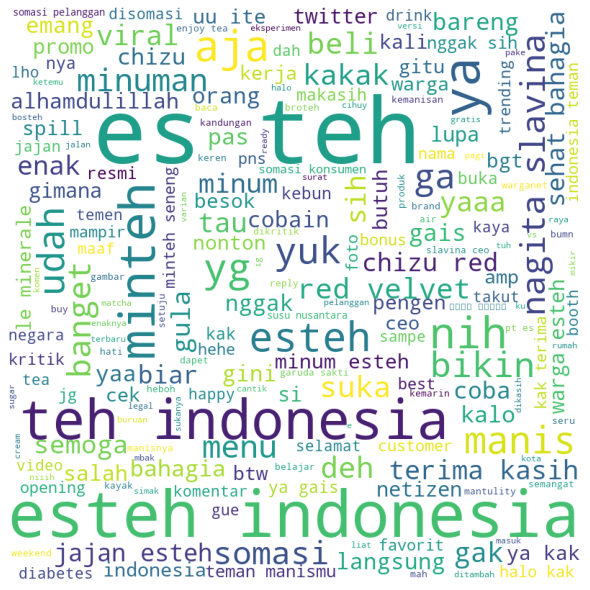

In [ ]:
# create wordcloud
wordcloud = WordCloud(width = 800, height = 800,
 background_color ='white',
 min_font_size = 10).generate(out)
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Pada hasil visualisasi di atas dapat dilihat bahwa es teh dan Indonesia memiliki ukuran lebih besar dibandingkan yang lainnya. Dengan demikian, dapat disimpulkan bahwa pembahasan topik sebagain besar mengenai tentang es teh Indonesia.

#frekuensi kata


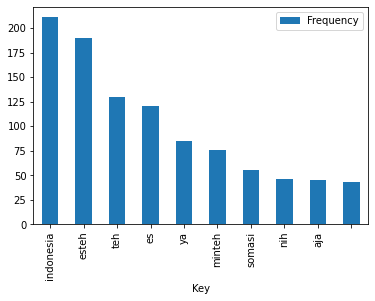

In [ ]:
# mencari frekuensi kata
df['DistText'] = df['content'].apply(preprocess_text) # process preprocessing text with function
fdist_title = FreqDist(sum(df['DistText'], [])) # count frequ
most_fdist_title = dict(fdist_title.most_common(10))
#visualize frekuensi kata
df_freq_tokens_title = pd.DataFrame.from_dict(most_fdist_title, orient='index')
df_freq_tokens_title.columns = ['Frequency']
df_freq_tokens_title.index.name = 'Key'
df_freq_tokens_title.plot(kind='bar')

Berdasarkan hasil grafik di atas diketahui bahwa kata yang sering muncul adalah Indoensia, esteh, teh, es, ya, minteh, somasi, min, aja. Selain itu, dapat diketahui juga bahwa kata Indoensia memiliki frekuensi terbesar yaitu  diatas 200 dan es teh yaitu diatas 175

#clustering TF-IDF

In [ ]:
#initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df = 5, max_df = 0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vector in X
X = vectorizer.fit_transform(df['CleanTwit'])
# initialize kmeans with 3 centroid
kmeans = KMeans(n_clusters=3, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster label in a variable
cluster = kmeans.labels_

#PCA

In [ ]:
# initialize PCA with 2 components
pca = PCA(n_components= 2, random_state=2022)
# pass our X to the PCA and store the reduced vector into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]
# assign clusters and pca vectors to our dataframe
df['cluster_title'] = cluster
df['x0_title'] = x0
df['x1_title'] = x1

#TOPIC CLUSTERING

In [ ]:
def get_top_keywords(n_terms):

  """ This function return the keywords for each centroid of the KMeans"""
  df = pd.DataFrame(X.todense()).groupby(cluster).mean() # groups the TF-IDF vector by cluster
  terms = vectorizer.get_feature_names_out() # acces tf-idf terms
  for i,r in df.iterrows():
      print('\nCluster {}'.format(i))
      """for each row of the dataframe, find the n terms that have the highest tf-id"""
      print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]]))
get_top_keywords(20)


Cluster 0
aja,viral,gais,nggak,yuk,sehat,teman,bahagia,terima,kasih,deh,menu,kak,udah,warga,jajan,minteh,ya,indonesia,esteh

Cluster 1
manis,yaaa,sih,beli,gak,yuk,kak,bahagia,banget,chizu,semoga,tau,kakak,bikin,ga,yg,aja,nih,minteh,ya

Cluster 2
ceo,pt,senin,dikritik,trending,yg,twitter,nagita,slavina,konsumen,minuman,pelanggan,kritik,netizen,manis,gula,somasi,indonesia,es,teh


#VISUALISASI CLUSTER

In [ ]:
# map clusters to appropriate labels
cluster_map = {0: "ajakan", 1: "respon positif", 2:"trending topik"}
# apply mapping
df['cluster_title'] = df['cluster_title'].map(cluster_map)

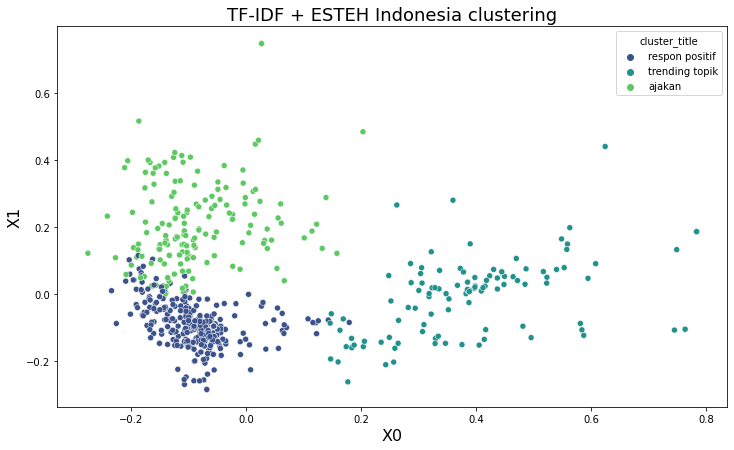

In [ ]:
# set image size
plt.figure(figsize=(12,7))
# set a title
plt.title("TF-IDF + ESTEH Indonesia clustering", fontdict={"fontsize":18})
# set axes name
plt.xlabel("X0", fontdict={"fontsize":16})
plt.ylabel("X1", fontdict={"fontsize":16})
# create a scatter plot with seaborn, where is hue is the class used to group the data
sns.scatterplot(data=df, x='x0_title', y='x1_title', hue='cluster_title', palette='viridis')
plt.show()

Berdasarkan grafik scatter plot di atas dapat diketahui bahwa data tersebut dikelompokkan menjadi 3 cluster yaitu respon positif, trending topik, ajakan. "respon positif" di sebelah kiri bawah, "trending topik" terletak di sebelah kanan bawah dan menyebar, serta "ajakan" terletak di kiri atas